## Walidacja wybranych modeli

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 34.5 MB/s 
     |████████████████████████████████| 209 kB 72.4 MB/s 
     |████████████████████████████████| 81 kB 10.4 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 147 kB 65.4 MB/s 
     |████████████████████████████████| 112 kB 73.1 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=7ed8d6cef646450e4e4dedbd1ffe9ce40721bde03eda1ca929698009a059b0c0
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [1]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.neighbors import KNeighborsClassifier
import optuna
from optuna.samplers import TPESampler
import matplotlib.pyplot as plt
import pickle
warnings.filterwarnings("ignore")

## Wczytanie danych

In [12]:
dataset = pd.read_csv("/content/drive/MyDrive/skinCare/daneSkinCare.csv")
dataset_with_fake_data = pd.read_csv("/content/drive/MyDrive/skinCare/DATASET.csv", encoding='utf-16')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/skinCare/daneSkinCare.csv'

In [13]:
dataset = pd.read_csv("daneSkinCare.csv")
dataset = pd.read_csv("DATASET.csv", encoding='utf-16')

In [6]:
print("Dataset shape: ", dataset.shape)

Dataset shape:  (225, 15)


In [7]:
print("Dataset columns: ", dataset.columns)

Dataset columns:  Index(['ID', 'Typ cery', 'Wrażliwa', 'Główny problem', 'Poboczny problem',
       'Wiek', 'Mycie', 'Serum na dzień', 'Krem na dzień', 'SPF',
       'Serum na noc', 'Krem na noc', 'Punktowo', 'Maseczka', 'Peeling'],
      dtype='object')


In [5]:
dataset.head(3)

,Typ cery,Wrażliwa,Główny problem,Poboczny problem,Wiek,Mycie,Serum na dzień,Krem na dzień,SPF,Serum na noc,Krem na noc,Punktowo,Maseczka,Peeling
0,Tłusta,0,Nadprodukcja sebum,Niedoskonałości,17,Neutrogena Visibly Clear Clear & Defend Facial...,Revox Just Niacinamide 10%,Tołpa - Authentic - Krem Matowa Skóra,SVR Sebiaclear Creme SPF 50,Eveline Cosmetics Beauty & Glow Matujące Serum...,SVR Sebiaclear Hydra,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nature Qu...,Brak
1,Mieszana,1,Nadprodukcja sebum,Niedoskonałości,20,Pharmaceris T Puri-Sebogel - antybakteryjny że...,Revox Just Niacinamide 10%,Bandi Medical Expert Anti Dry Emulsja silnie n...,Missha - All-Around Safe Block Aqua Sun Gel SP...,The Ordinary - Niacinamide 10% + Zinc 1% - Ser...,SVR Sebiaclear Hydra,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nacomi Bi...,BANDI ANTI ACNE antytrądzikowy peeling kwasowy...
2,Mieszana,1,Nadprodukcja sebum,Niedoskonałości,20,Pharmaceris T Puri-Sebogel - antybakteryjny że...,Revox Just Niacinamide 10%,Cetaphil - Pro Oil Control SPF30 - Krem Nawilż...,Missha - All-Around Safe Block Aqua Sun Gel SP...,The Ordinary - Niacinamide 10% + Zinc 1% - Ser...,Dermedic Melumin,Bandi - Sebo Care - Pasta Punktowa na Niedosko...,Nacomi Next Lvl Kwas Salicylowy 2% + Nacomi Bi...,BANDI ANTI ACNE antytrądzikowy peeling kwasowy...


In [9]:
print("Dataset info: ", dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                225 non-null    int64 
 1   Typ cery          225 non-null    object
 2   Wrażliwa          225 non-null    int64 
 3   Główny problem    225 non-null    object
 4   Poboczny problem  225 non-null    object
 5   Wiek              225 non-null    int64 
 6   Mycie             225 non-null    object
 7   Serum na dzień    225 non-null    object
 8   Krem na dzień     225 non-null    object
 9   SPF               225 non-null    object
 10  Serum na noc      225 non-null    object
 11  Krem na noc       225 non-null    object
 12  Punktowo          225 non-null    object
 13  Maseczka          225 non-null    object
 14  Peeling           225 non-null    object
dtypes: int64(3), object(12)
memory usage: 26.5+ KB
Dataset info:  None


In [10]:
print("Dataset isna: ", dataset.isna().sum())
print("Dataset unique: ", dataset.nunique())

Dataset isna:  ID                  0
Typ cery            0
Wrażliwa            0
Główny problem      0
Poboczny problem    0
Wiek                0
Mycie               0
Serum na dzień      0
Krem na dzień       0
SPF                 0
Serum na noc        0
Krem na noc         0
Punktowo            0
Maseczka            0
Peeling             0
dtype: int64
Dataset unique:  ID                  225
Typ cery              5
Wrażliwa              2
Główny problem        8
Poboczny problem     10
Wiek                 22
Mycie                24
Serum na dzień       19
Krem na dzień        23
SPF                  16
Serum na noc         13
Krem na noc          20
Punktowo             13
Maseczka             12
Peeling              10
dtype: int64


In [2]:
encoder = None
encoders = {}
labelsDescription = {}
skinType = None
isSensitive = None
mainProblem = None
secondProblem = None
age = None
resultSkinCare = {}
models = []
accuracy = {}
products = {}
link = None
chosenProduct = None

accuracyDecisionTree = {}
accuracyKNN = {}
accuracyRandomForest = {}

allAccuracy = {}

askedColumnNames = ['Typ cery', 'Główny problem', 'Poboczny problem', 'Wrażliwa','Wiek']
categoricalColumnNames = ['Typ cery', 'Główny problem', 'Poboczny problem']
DECISION_COLUMN_NAMES = ['Mycie','Serum na dzień','Krem na dzień','SPF','Serum na noc','Krem na noc','Punktowo','Maseczka','Peeling']
allColumns = askedColumnNames + DECISION_COLUMN_NAMES
allCategoricalColumns = categoricalColumnNames + DECISION_COLUMN_NAMES

In [9]:
def getProblemColumnIndex(problemName):
    if problemName == 'Mycie':
        return 5
    elif problemName == 'Serum na dzień':
        return 6
    elif problemName == 'Krem na dzień':
        return  7
    elif problemName == 'SPF' :
        return  8
    elif problemName == 'Serum na noc':
        return  9
    elif problemName == 'Krem na noc':
        return  10
    elif problemName == 'Punktowo':
        return  11
    elif problemName == 'Maseczka':
        return  12
    elif problemName == 'Peeling':
        return  13
    else :
        raise ValueError("Nie rozpoznano kategorii produktu.")

## Wczytanie oczyszonych danych

In [4]:
labeledDataset = pd.read_csv("/content/drive/MyDrive/skinCare/labeledDataset.csv", sep=',')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/skinCare/labeledDataset.csv'

In [5]:
labeledDataset = pd.read_csv("labeledDataset.csv", sep=',')

In [6]:
labeledDataset

,Typ cery,Wrażliwa,Główny problem,Poboczny problem,Wiek,Mycie,Serum na dzień,Krem na dzień,SPF,Serum na noc,Krem na noc,Punktowo,Maseczka,Peeling
0,3,0,0,2,17,16,12,19,12,4,15,1,10,2
1,0,1,0,2,20,19,12,2,5,11,15,1,9,0
2,0,1,0,2,20,19,12,10,5,11,9,1,9,0
3,3,1,1,4,20,1,2,1,5,1,4,0,9,0
4,0,1,1,3,17,6,12,1,13,7,3,1,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5213,0,1,5,4,21,1,4,8,5,8,14,1,7,7
5214,3,0,1,0,31,6,15,1,5,12,14,0,5,5
5215,0,1,0,3,19,23,11,0,5,11,7,2,8,7
5216,1,1,1,4,19,15,8,17,7,12,0,2,5,7


Typy danych w zbiorze po kodowaniu LabelEncoder 

In [16]:
labeledDataset.dtypes

Typ cery            int64
Wrażliwa            int64
Główny problem      int64
Poboczny problem    int64
Wiek                int64
Mycie               int64
Serum na dzień      int64
Krem na dzień       int64
SPF                 int64
Serum na noc        int64
Krem na noc         int64
Punktowo            int64
Maseczka            int64
Peeling             int64
dtype: object

In [17]:
def defineModel(model):
    if model == 'DecisionTreeClassifier':
        return DecisionTreeClassifier()
    elif model == 'KNeighborsClassifier':
        return KNeighborsClassifier()
    elif model == 'RandomForestClassifier':
        return RandomForestClassifier()

In [10]:
def getProblemColumnIndex(problemName):
    if problemName == 'Mycie':
        return 5
    elif problemName == 'Serum na dzień':
        return 6
    elif problemName == 'Krem na dzień':
        return  7
    elif problemName == 'SPF' :
        return  8
    elif problemName == 'Serum na noc':
        return  9
    elif problemName == 'Krem na noc':
        return  10
    elif problemName == 'Punktowo':
        return  11
    elif problemName == 'Maseczka':
        return  12
    elif problemName == 'Peeling':
        return  13
    else:
        raise ValueError("Nie rozpoznano kategorii produktu.")

In [19]:
X_train = None
X_test = None
y_train = None
y_test = None

#problemName, dumDf, dataset, modelName, maxDepth = None, criterion = None, maxFeatures = None, minSamplesLeaf = None, minSamplesSplit = None, nEstimators = None, nn = None, C = None, penalty = None, learningRate = None, dropoutRate = None

def makeSingleProblemModel(problemName, dumDf, dataset, modelName, **kwargs):
    global accuracy, X_train, X_test, y_train, y_test
    problemIndex = getProblemColumnIndex(problemName)
    X = dumDf.values[:, 0:5]
    yProblem = dataset.values[:, problemIndex]
    X_train, X_test, y_train, y_test = train_test_split(X, yProblem, test_size = 0.25)

    #get criterion from kwargs
    if modelName == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(max_depth = kwargs['maxDepth'], 
        criterion = kwargs['criterion'], 
        min_samples_leaf = kwargs['minSamplesLeaf'], 
        min_samples_split = kwargs['minSamplesSplit']
        )
    elif modelName == 'KNeighborsClassifier':
        model = KNeighborsClassifier(n_neighbors = kwargs['nn'], 
        weights = kwargs['weights'],
        metric = kwargs['metric'],
        )
    elif modelName == 'RandomForestClassifier':
        model = RandomForestClassifier(max_depth = kwargs['maxDepth'], 
        criterion = kwargs['criterion'], 
        max_features = kwargs['maxFeatures'], 
        min_samples_leaf = kwargs['minSamplesLeaf'], 
        min_samples_split = kwargs['minSamplesSplit'], 
        n_estimators = kwargs['nEstimators']
        )

    model = model.fit(X_train, y_train)
    yPrediction = model.predict(X_test)
    
    if modelName == 'DecisionTreeClassifier':
        accuracyDecisionTree[problemName] = str(accuracy_score(y_test, yPrediction)*100)
    elif modelName == 'KNeighborsClassifier':
        accuracyKNN[problemName] = str(accuracy_score(y_test, yPrediction)*100)
    elif modelName == 'RandomForestClassifier':
        accuracyRandomForest[problemName] = str(accuracy_score(y_test, yPrediction)*100)    
        
    return model

In [20]:
#normalize data and save it to dataframe
def normalizeData(data):
    result = data.copy()
    for feature_name in data.columns:
        max_value = data[feature_name].max()
        min_value = data[feature_name].min()
        result[feature_name] = (data[feature_name] - min_value) / (max_value - min_value)
    return result

normalizedDataset = normalizeData(labeledDataset)

In [21]:
normalizedDataset

,Typ cery,Wrażliwa,Główny problem,Poboczny problem,Wiek,Mycie,Serum na dzień,Krem na dzień,SPF,Serum na noc,Krem na noc,Punktowo,Maseczka,Peeling
0,1.000000,0.0,0.000000,0.222222,0.047619,0.695652,0.666667,0.863636,0.800000,0.333333,0.789474,0.083333,0.909091,0.222222
1,0.000000,1.0,0.000000,0.222222,0.190476,0.826087,0.666667,0.090909,0.333333,0.916667,0.789474,0.083333,0.818182,0.000000
2,0.000000,1.0,0.000000,0.222222,0.190476,0.826087,0.666667,0.454545,0.333333,0.916667,0.473684,0.083333,0.818182,0.000000
3,1.000000,1.0,0.142857,0.444444,0.190476,0.043478,0.111111,0.045455,0.333333,0.083333,0.210526,0.000000,0.818182,0.000000
4,0.000000,1.0,0.142857,0.333333,0.047619,0.260870,0.666667,0.045455,0.866667,0.583333,0.157895,0.083333,0.818182,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,0.333333,1.0,1.000000,0.000000,0.095238,0.956522,0.388889,0.045455,0.466667,1.000000,0.263158,0.166667,0.636364,0.222222
10214,0.666667,0.0,1.000000,0.000000,0.190476,0.652174,0.388889,0.090909,0.866667,0.416667,0.157895,0.083333,0.818182,0.111111
10215,0.333333,1.0,0.142857,0.000000,0.095238,0.956522,0.444444,0.363636,0.333333,0.166667,0.894737,0.083333,0.636364,0.111111
10216,0.000000,0.0,1.000000,0.333333,0.285714,0.826087,0.000000,0.045455,0.333333,1.000000,0.842105,0.583333,0.636364,0.111111


In [22]:
optuna_score_knn = {}
optuna_score_decision_tree = {}
optuna_score_random_forest = {}

optuna_best_params_knn = {}
optuna_best_params_decision_tree = {}
optuna_best_params_random_forest = {}

problem_global = None

dataset = dataset_with_fake_data

In [ ]:
allAccuracy

{'DecisionTreeClassifier': {'Mycie': '18.0327868852459',
  'Serum na dzień': '22.950819672131146',
  'Krem na dzień': '19.672131147540984',
  'SPF': '24.91803278688525',
  'Serum na noc': '21.639344262295083',
  'Krem na noc': '15.081967213114755',
  'Punktowo': '34.0983606557377',
  'Maseczka': '30.491803278688522',
  'Peeling': '27.86885245901639'},
 'KNeighborsClassifier': {'Mycie': '15.40983606557377',
  'Serum na dzień': '25.901639344262296',
  'Krem na dzień': '18.0327868852459',
  'SPF': '24.262295081967213',
  'Serum na noc': '21.311475409836063',
  'Krem na noc': '15.40983606557377',
  'Punktowo': '40.0',
  'Maseczka': '25.573770491803277',
  'Peeling': '33.114754098360656'}}

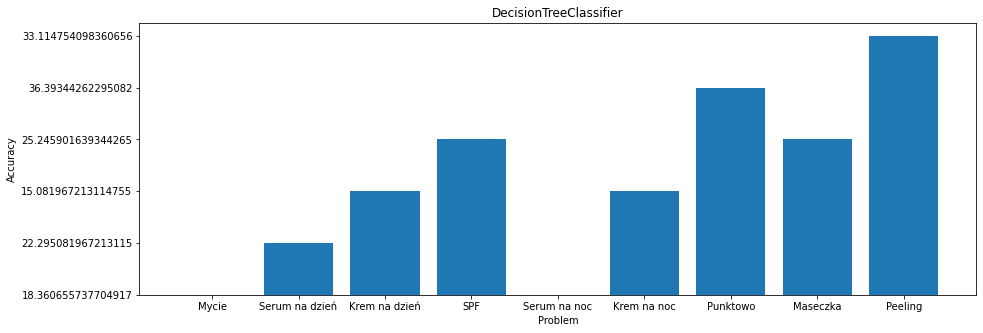

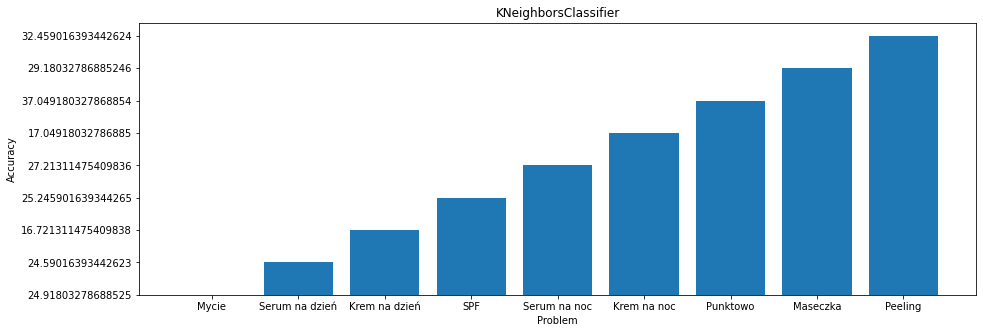

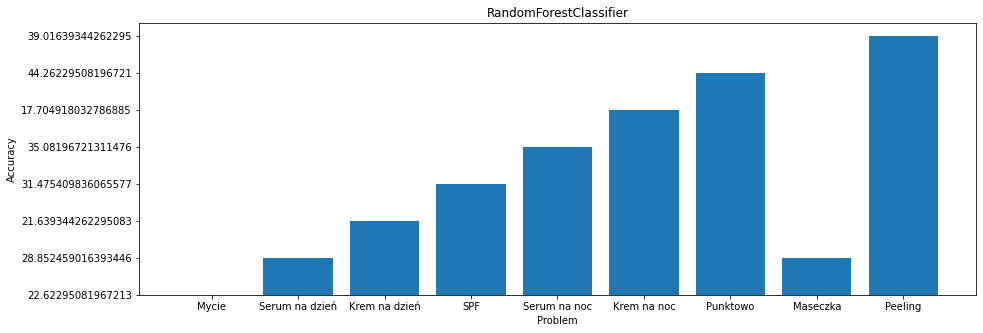

In [ ]:
def createGraphOfAccuracy():
    for model in allAccuracy:
        plt.figure(figsize=(15, 5))
        plt.bar(allAccuracy[model].keys(), allAccuracy[model].values())
        plt.title(model)
        plt.xlabel('Problem')
        plt.ylabel('Accuracy')
        plt.show() 
        
createGraphOfAccuracy()

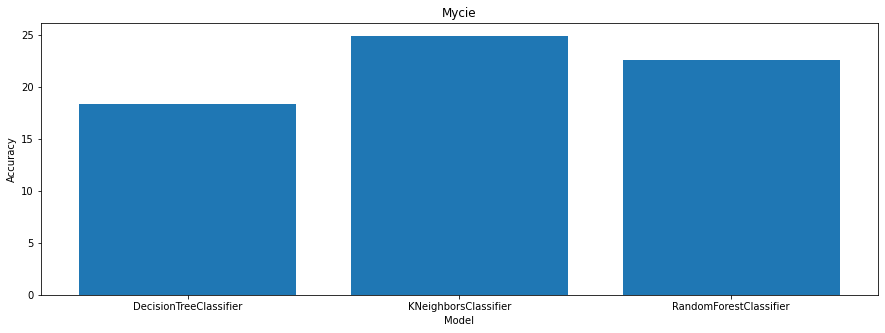

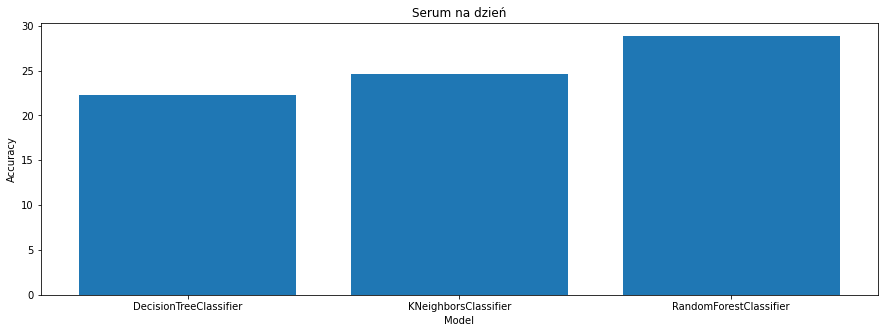

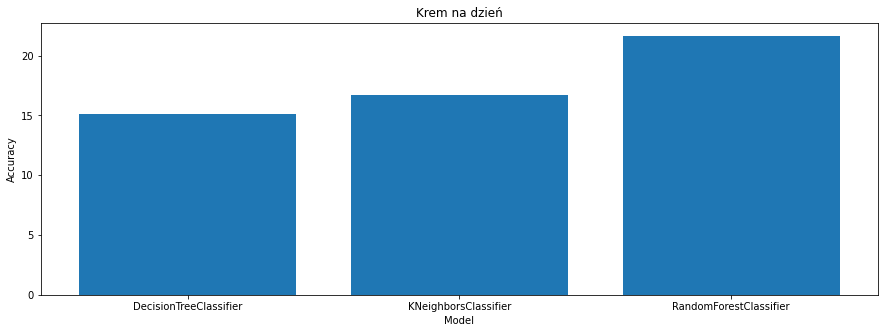

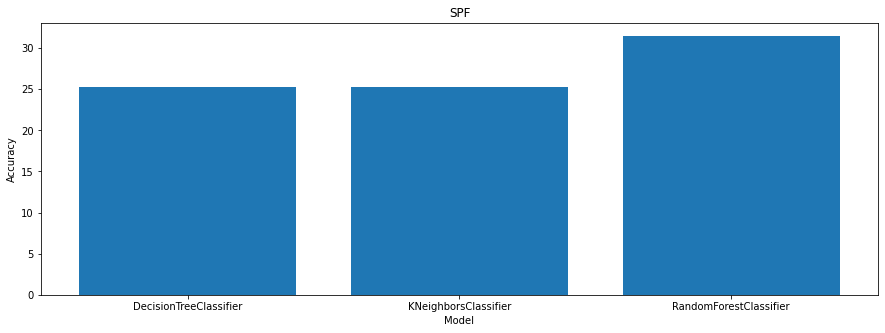

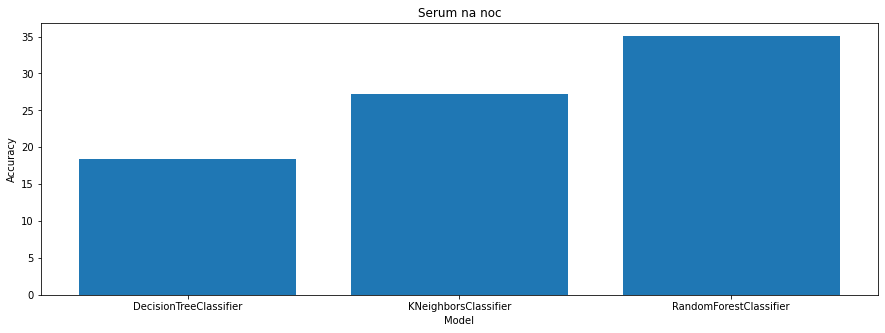

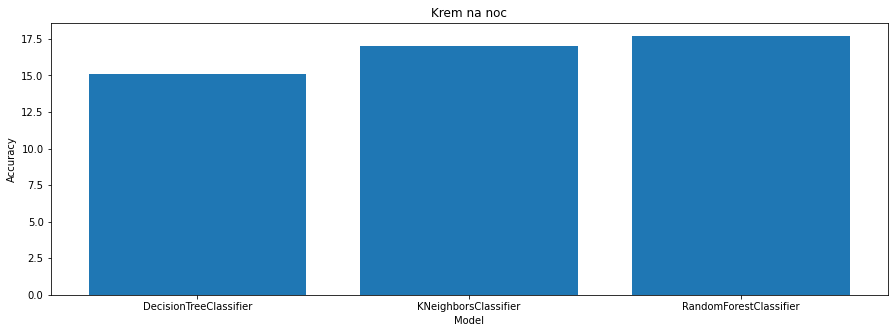

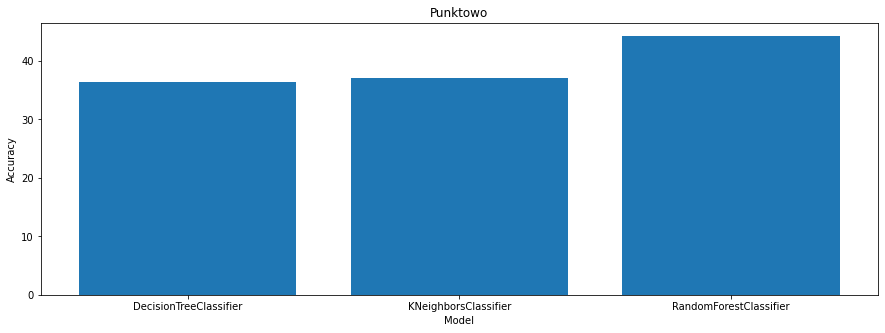

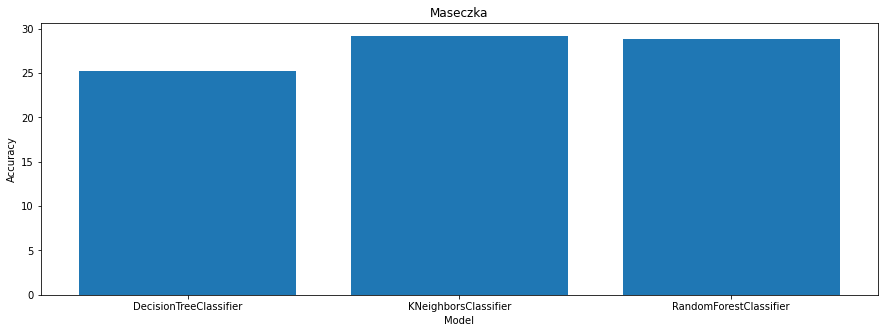

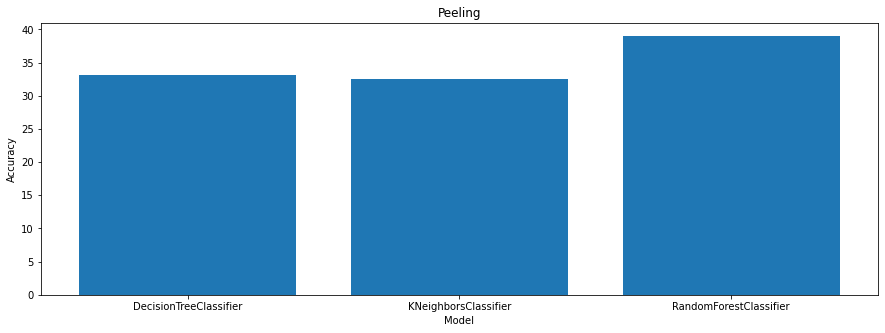

In [ ]:
#compare the float value of accuracy of all models for each problem in one graph
def compareAccuracyOfAllModels():
    for problem in DECISION_COLUMN_NAMES:
        plt.figure(figsize=(15, 5))
        plt.bar(allAccuracy.keys(), [float(allAccuracy[model][problem]) for model in allAccuracy])
        plt.title(problem)
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.show()

compareAccuracyOfAllModels()

In [7]:
#count how many times each model is the best for each problem
def countBestModelForEachProblem():
    bestModel = {}
    for problem in DECISION_COLUMN_NAMES:
        bestModel[problem] = max(allAccuracy, key=lambda model: float(allAccuracy[model][problem]))
    return bestModel

bestModel = countBestModelForEachProblem()
bestModel

ValueError: max() arg is an empty sequence

In [38]:
from sklearn import tree

In [26]:
allAccuracy = {}

In [10]:
#read models from files
for singleDecisionColumn in DECISION_COLUMN_NAMES:
    filename = "{column}.sv".format(column = singleDecisionColumn.replace(" ", "_"))
    problemModel = pickle.load(open(filename, 'rb'))

    #get model name
    modelName = problemModel.__class__.__name__
    print(modelName)

    problemIndex = getProblemColumnIndex(singleDecisionColumn)
    X = labeledDataset.values[:, 0:5]
    yProblem = labeledDataset.values[:, problemIndex]
    X_train, X_test, y_train, y_test = train_test_split(X, yProblem, test_size = 0.25)

    yPrediction = problemModel.predict(X_test)
    print("Accuracy of {column} is {accuracy}".format(column = singleDecisionColumn, accuracy = accuracy_score(y_test, yPrediction)))

    #save accuracy of each model for each problem in a dictionary
    allAccuracy[singleDecisionColumn] = accuracy_score(y_test, yPrediction)



RandomForestClassifier
Accuracy of Mycie is 0.3195402298850575
RandomForestClassifier
Accuracy of Serum na dzień is 0.28888888888888886
RandomForestClassifier
Accuracy of Krem na dzień is 0.20306513409961685
RandomForestClassifier
Accuracy of SPF is 0.26666666666666666
RandomForestClassifier
Accuracy of Serum na noc is 0.31800766283524906
RandomForestClassifier
Accuracy of Krem na noc is 0.30268199233716475
RandomForestClassifier
Accuracy of Punktowo is 0.4306513409961686
RandomForestClassifier
Accuracy of Maseczka is 0.2896551724137931
RandomForestClassifier
Accuracy of Peeling is 0.40383141762452107


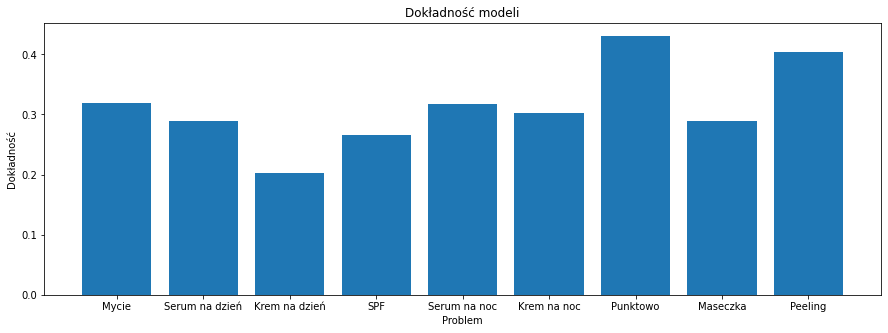

In [13]:
#make plot of accuracy
def createGraphOfAccuracy():
    plt.figure(figsize=(15, 5))
    plt.bar(allAccuracy.keys(), allAccuracy.values())
    plt.title('Dokładność modeli')
    plt.xlabel('Problem')
    plt.ylabel('Dokładność')
    plt.show()

createGraphOfAccuracy()
